In [ ]:
!pip install keras==2.2.4

In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import csv
import numpy as np
from tqdm import tqdm
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv1D
from tensorflow.keras.layers import MaxPooling2D, Flatten, Lambda
from tensorflow.keras.layers import MaxPooling1D, concatenate
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import tensorflow_probability as tfp
tfd=tfp.distributions
tfpl=tfp.layers

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
# load model
latent_dim=1
#model = load_model('/content/drive/MyDrive/Daming Colab/Ranking/Model/SqueezeNet_Model_DistributionMDN.h5',custom_objects={"custom_activation": custom_activation})
model = load_model('/content/drive/MyDrive/Daming Colab/Ranking/Model/_rankingnet_mobilenet2050_0.01dp50eMD.h5')

#_rankingnet_mobilenet2050_30eMD

# 4.6shift_Ranking_Net_30eND
# 4.3shift_Ranking_Net_Lambda30e
# RankingModel_SMS2
# MobileNet_0shift_Ranking_Net_Lambda20e

# Show the model architecture
model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
____________________________________________________________________________________________

In [ ]:
def RandomPredict():
    index=random.sample(range(1,Frames_num),1)
    Frame_1=Frames[index[0]]
    Frame_1=preparePredict(Frames_Path+'/'+Frame_1)
    score=Predict(Frame_1)
    return index,score

In [60]:
def preparePredict(path):   
    Image=cv2.imread(path)
    #Image=cv2.resize(Image,(224,224))
    Image=np.expand_dims(Image,axis=0)   
    return Image

def Predict(img):
    #score=model.predict(img)
    score=model.predict(img)
    score=np.squeeze(score)
    return score

def Ranking(i):
    Frame_temp = Frames[i]
    Frame = preparePredict(Frames_Path+'/'+Frame_temp)
    score = Predict(Frame)
    print("id: ",i,"'s score: ",score)
    '''''
    mean=score[0]
    var=score[1]  
    '''''
    return score

Frames_Path='/content/drive/MyDrive/Daming Colab/Ranking/Frames_newpanda3'

for files in  os.listdir(Frames_Path):     
    Frames= os.listdir(Frames_Path)
    
Frames_num=np.size(Frames)
print('Frames_num == ',Frames_num)

Frames_num ==  201


**Prediction**

In [51]:
Ranking(107)
Ranking(100)

id:  107 's score:  [ 1.5829656  1.5592978 -3.2667332]
id:  100 's score:  [-0.22366612 -0.23631223 -3.3912017 ]


array([-0.22366612, -0.23631223, -3.3912017 ], dtype=float32)

**Complete** Ranking

In [61]:
# create array to store id and score
score=np.zeros(Frames_num)
mean=np.zeros(Frames_num)
logstd=np.zeros(Frames_num)
idlist=np.zeros(Frames_num)

#for j in range(10):  
for i in range(Frames_num):

    #(score[i],mean[i],logvar[i])=Ranking(i)
    (score[i],mean[i],logstd[i])=Ranking(i)

    #stddev[i] = tf.math.exp(logvar[i]*0.5)
    #esp = np.random.randn()
    #score[i] = mean[i] + stddev[i]*esp

    idlist[i]=i

id:  0 's score:  [ 1.0540869  1.0853816 -3.5200787]
id:  1 's score:  [ 1.5541267  1.5586476 -3.3919256]
id:  2 's score:  [-1.2685627 -1.3912411 -2.9271445]
id:  3 's score:  [-0.52792585 -0.54492545 -3.511848  ]
id:  4 's score:  [-1.2390147 -1.2525257 -2.9358742]
id:  5 's score:  [-1.2215015 -1.2303691 -2.9464722]
id:  6 's score:  [-0.9796435 -1.0189084 -2.9545927]
id:  7 's score:  [-0.80077004 -0.7209292  -2.9620314 ]
id:  8 's score:  [-0.8425178  -0.71530306 -2.8348498 ]
id:  9 's score:  [-0.9166414 -0.8574464 -2.7356415]
id:  10 's score:  [-1.1324658 -1.1658621 -2.901786 ]
id:  11 's score:  [ 0.82421625  0.87414217 -2.74445   ]
id:  12 's score:  [ 1.4895476  1.3391114 -2.7662392]
id:  13 's score:  [-0.8556468 -0.8452906 -2.9934764]
id:  14 's score:  [ 0.05289364  0.00602475 -2.801132  ]
id:  15 's score:  [-0.08461633 -0.16880715 -2.6834338 ]
id:  16 's score:  [-0.6800232 -0.6457023 -2.959532 ]
id:  17 's score:  [-0.57573164 -0.584214   -2.8813982 ]
id:  18 's score:

**Percentage?**

In [5]:
max_score=max(score)
min_score=min(score)
max_id=np.argmax(score)
min_id=np.argmin(score)

print('maxscore',max_score,'maxid',max_id)
print('minscore',min_score,'minid',min_id)
'''
deltascore=max_score-min_score
scaleindex=1/deltascore

for i in range(Frames_num):
    score[i]=(score[i]-min_score)*scaleindex
'''

maxscore 4.22691535949707 maxid 183
minscore -1.6575615406036377 minid 0


'\ndeltascore=max_score-min_score\nscaleindex=1/deltascore\n\nfor i in range(Frames_num):\n    score[i]=(score[i]-min_score)*scaleindex\n'

# **shift****Plot**

In [62]:
logstd_s=logstd+3
mean=mean

Text(0, 0.5, 'score')

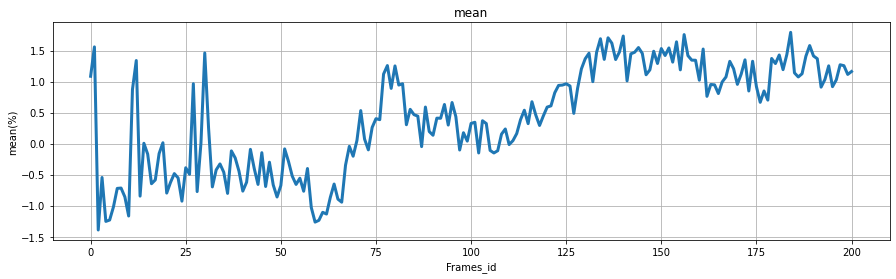

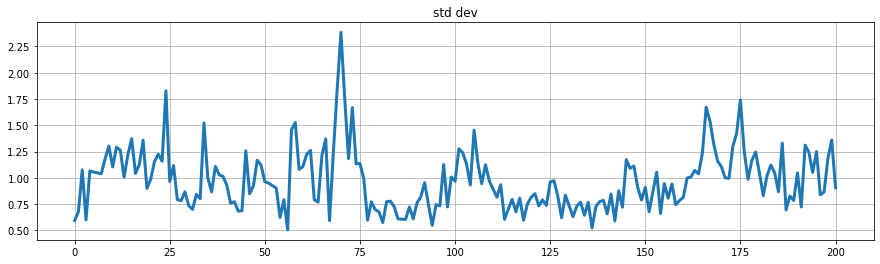

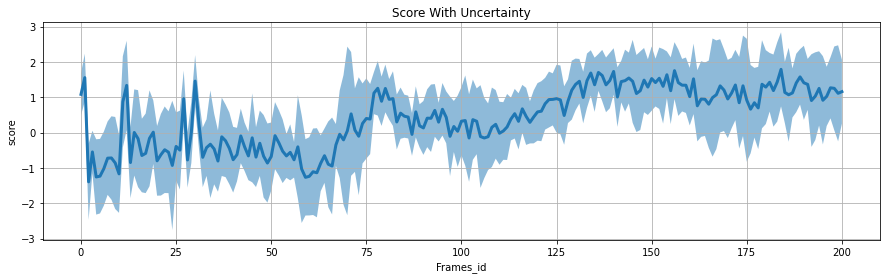

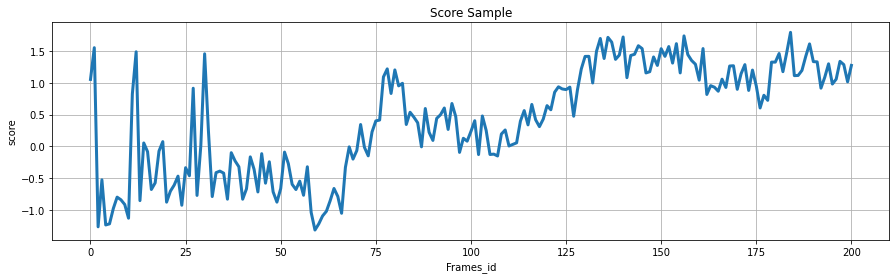

In [63]:
fig=plt.figure(figsize=(15,4))
plt.plot(idlist,mean,lw=3)
plt.grid()
plt.title("mean")
plt.xlabel('Frames_id')
plt.ylabel('mean(%)')
#cv2.imwrite('Frames Ranking_CommonVideo.png',plt)


fig=plt.figure(figsize=(15,4))
sd = tf.math.exp(logstd_s)
plt.plot(idlist,sd,lw=3)
plt.grid()
plt.title("std dev")

fig=plt.figure(figsize=(15,4))
plt.plot(idlist,mean,lw=3)
plt.fill_between(idlist,mean+sd,mean-sd, alpha=0.5)
plt.grid()
plt.title("Score With Uncertainty")
plt.xlabel('Frames_id')
plt.ylabel('score')


fig=plt.figure(figsize=(15,4))
plt.plot(idlist,score,lw=3)
plt.grid()
plt.title("Score Sample")
plt.xlabel('Frames_id')
plt.ylabel('score')


Text(0, 0.5, 'sample')

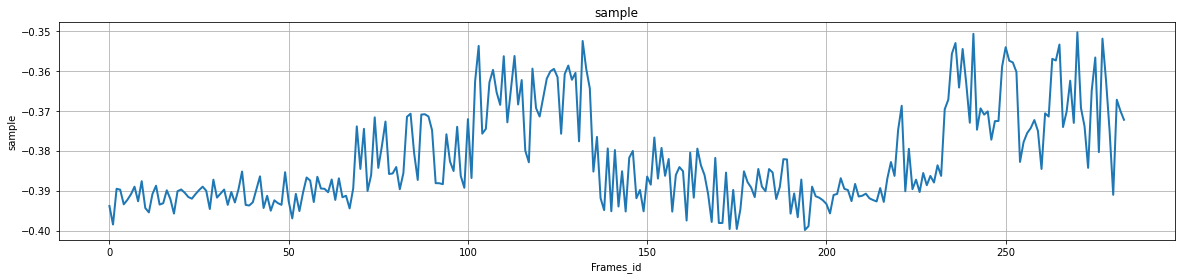

In [84]:
sample = np.zeros(Frames_num)
sample = mean + tf.math.exp(logvar*0.5) * np.random.randn()
#print(sample)
fig=plt.figure(figsize=(20,4))
plt.plot(idlist,sample,lw=2)
plt.grid()
plt.title("sample")
plt.xlabel('Frames_id')
plt.ylabel('sample')

Text(0, 0.5, 'sample')

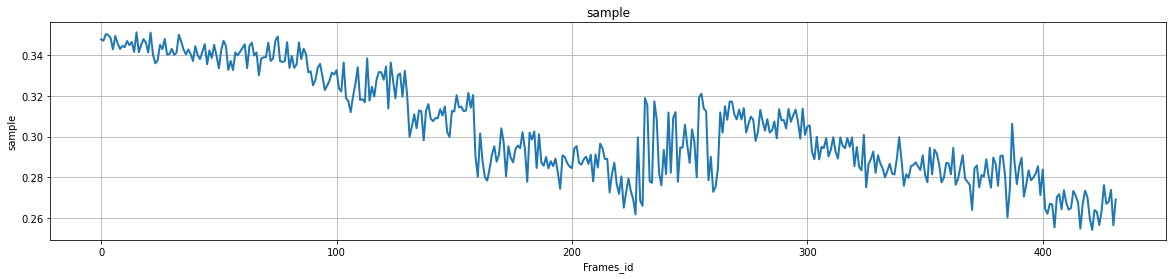

In [ ]:
sample = np.zeros(Frames_num)
sample = mean + tf.math.exp(logvar*0.5) * np.random.randn()
#print(sample)
fig=plt.figure(figsize=(20,4))
plt.plot(idlist,sample,lw=2)
plt.grid()
plt.title("sample")
plt.xlabel('Frames_id')
plt.ylabel('sample')

Text(0, 0.5, 'sample')

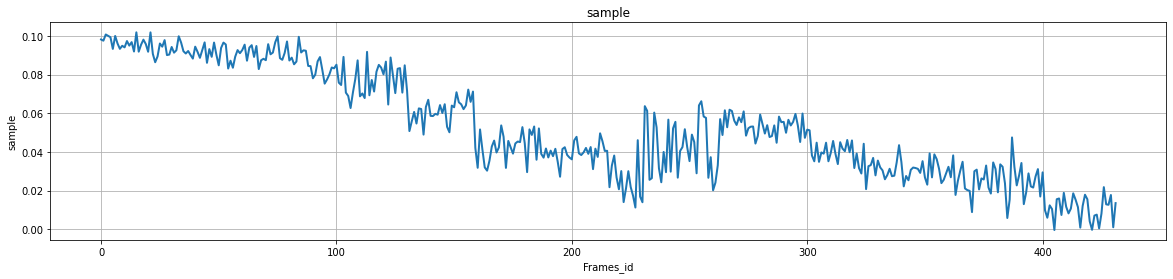

In [ ]:
sample = np.zeros(Frames_num)
sample = mean + tf.math.exp(logvar*0.5) * np.random.randn()
#print(sample)
fig=plt.figure(figsize=(20,4))
plt.plot(idlist,sample,lw=2)
plt.grid()
plt.title("sample")
plt.xlabel('Frames_id')
plt.ylabel('sample')

Text(0, 0.5, 'sample')

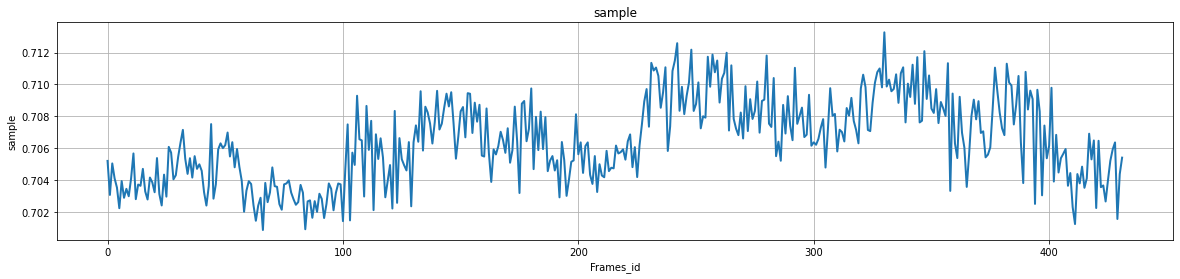

In [ ]:
sample = np.zeros(Frames_num)
sample = mean + tf.math.exp(logvar*0.5) * np.random.randn()
#print(sample)
fig=plt.figure(figsize=(20,4))
plt.plot(idlist,sample,lw=2)
plt.grid()
plt.title("sample")
plt.xlabel('Frames_id')
plt.ylabel('sample')